In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.7, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/22 [==============================] - 2s 66ms/step - loss: 1.3529 - accuracy: 0.3813 - val_loss: 1.1229 - val_accuracy: 0.7358

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 1.1643 - accuracy: 0.4895 - val_loss: 0.9566 - val_accuracy: 0.7633

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.0207 - accuracy: 0.5709 - val_loss: 0.8233 - val_accuracy: 0.7633

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8896 - accuracy: 0.6197 - val_loss: 0.7244 - val_accuracy: 0.7908

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8247 - accuracy: 0.6591 - val_l


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.9093 - val_loss: 0.0463 - val_accuracy: 0.9992

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9132 - val_loss: 0.0489 - val_accuracy: 0.9992

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2206 - accuracy: 0.9243 - val_loss: 0.0454 - val_accuracy: 0.9992

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9104 - val_loss: 0.0429 - val_accuracy: 0.9992

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
22/22 [==

22/22 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9407 - val_loss: 0.0212 - val_accuracy: 1.0000

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9470 - val_loss: 0.0199 - val_accuracy: 1.0000

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1765 - accuracy: 0.9361 - val_loss: 0.0204 - val_accuracy: 1.0000

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9545 - val_loss: 0.0197 - val_accuracy: 1.0000

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9436 - val_loss: 0.017


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1530 - accuracy: 0.9483 - val_loss: 0.0123 - val_accuracy: 1.0000

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9518 - val_loss: 0.0112 - val_accuracy: 1.0000

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1266 - accuracy: 0.9539 - val_loss: 0.0091 - val_accuracy: 1.0000

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9521 - val_loss: 0.0095 - val_accuracy: 1.0000

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
22/2

22/22 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9589 - val_loss: 0.0077 - val_accuracy: 1.0000

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9543 - val_loss: 0.0073 - val_accuracy: 1.0000

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9444 - val_loss: 0.0084 - val_accuracy: 1.0000

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9642 - val_loss: 0.0076 - val_accuracy: 1.0000

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9399 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9642 - val_loss: 0.0065 - val_accuracy: 1.0000

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9595 - val_loss: 0.0066 - val_accuracy: 1.0000

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1062 - accuracy: 0.9650 - val_loss: 0.0059 - val_accuracy: 1.0000

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9673 - val_loss: 0.0048 - val_accuracy: 1.0000

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
22/2

22/22 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9631 - val_loss: 0.0041 - val_accuracy: 1.0000

Epoch 00220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 221/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9678 - val_loss: 0.0040 - val_accuracy: 1.0000

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9634 - val_loss: 0.0044 - val_accuracy: 1.0000

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9649 - val_loss: 0.0042 - val_accuracy: 1.0000

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9649 - val_loss: 0


Epoch 00256: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 257/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9685 - val_loss: 0.0035 - val_accuracy: 1.0000

Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9697 - val_loss: 0.0032 - val_accuracy: 1.0000

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00258: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.9999404e-01 5.7826019e-06 3.8005343e-08 9.4135203e-08]
0


# 混同行列

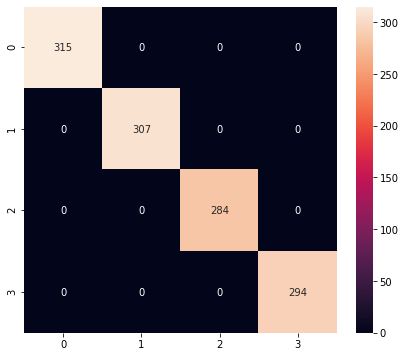

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       294

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\olivi\AppData\Local\Temp\tmp6af4zqbe\assets


6352

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9999404e-01 5.7826019e-06 3.8005268e-08 9.4135203e-08]
0
